In [1]:
# 定数の設定
γ   = 1.0
u0   = 0.1
Δt  = 0.1

# 関数 f(u,U)
f(u, U) = u - U - Δt * γ * (sin((u+U)/2))^(1.2)

# 微分 df/du
df(u, U) = 1 -
  0.6 * Δt * γ * (sin((u+U)/2))^(0.2) * cos((u+U)/2)

df (generic function with 1 method)

In [2]:
# Newton 法で、U から u を求める
function newton(old_u)
    u = old_u # とりあえず、初期値を古い値の U と一致させておいて…

    for i in 1:100
      if abs( f(u,old_u) ) < 1.0e-6   # 6桁あってれば
        break   # ループ(この場合は for )から脱出する．
      end
      u = u - f(u,old_u)/df(u,old_u) # Newton 法で u を改善する．
    end

    return u # f が十分にゼロに近くなったら、近似値 u を返す
end

newton (generic function with 1 method)

In [3]:
u = u0       # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = newton(u) # Newton 法で新しい時間ステップの値が求まって出てくるはず．
    push!(u_sq, u) # その値を配列に追加していく．
end

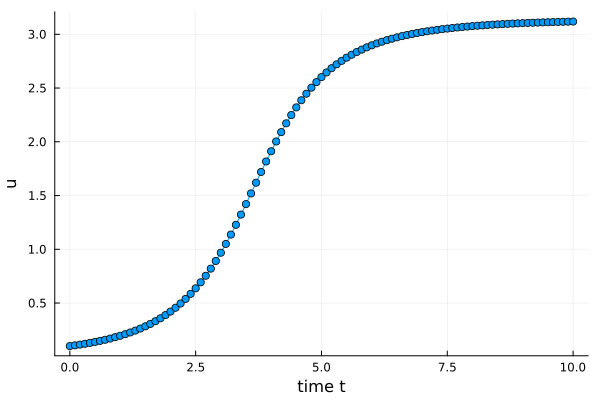

In [4]:
using Plots

t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [5]:
Δt = 1.2

1.2

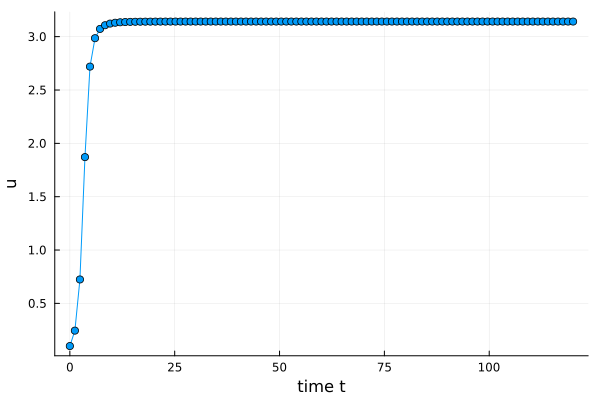

In [6]:
u = u0       # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = newton(u) # Newton 法で新しい時間ステップの値が求まって出てくるはず．
    push!(u_sq, u) # その値を配列に追加していく．
end

t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [7]:
using NLsolve

function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [8]:
using NLsolve

function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [9]:
Δt = 0.1 # 時間刻み幅を元に戻しておいて、

u_old = u0  # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u_old ] # 初期値を配列に入れておいて…

for n in 1:100
    u = nls(f, u_old, ini = u_old)[1]  # 関数 nls で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
    u_old = u # 古い値を保持する変数に新しい値を入れて、次の時間へ
end


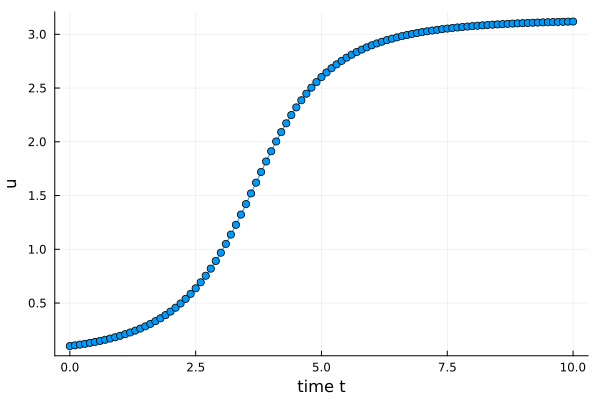

In [10]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [11]:
Δt = 1.2 # 時間刻み幅を大きくしてみる

u_old = u0  # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u_old ] # 初期値を配列に入れておいて…

for n in 1:100
    u = nls(f, u_old, ini = u_old)[1]  # 関数 nls で新しい値をいきなり求める．
    println(n, ": ", u, " ", sin((u+u_old)/2))
    push!(u_sq, u) # その値を配列に追加していく．
    u_old = u # 古い値を保持する変数に新しい値を入れて、次の時間へ
end

1: 0.2445828206408548 0.17144028204630682
2: 0.7241519610699485 0.4656486127362301
3: 1.8709232707904873 0.962896580041833
4: 2.7192167342635747 0.7489808758544224
5: 2.985520115427732 0.2852087610786438
6: 3.0725584588957093 0.1123158743514151
7: 3.1069544379675222 0.0518129943639024
8: 3.1225677124829754 0.026828358987976905
9: 3.1304047960356782 0.015105824781990605
10: 3.1346510039397333 0.009064629461162748
11: 3.1370946477756876 0.005719796543410794
12: 3.1385715278210715 0.003759556934926038
13: 3.139501169967586 0.0025563019113543084
14: 3.140106810914135 0.0017886621951831016
15: 3.140513174918811 0.00128266032161094
16: 3.1407928947061197 0.000939618639065662
17: 3.140989805063468 0.0007013036475126663
18: 3.141131196989348 0.0005321525382685236
19: 3.1412345332852865 0.0004097884410071393
20: 3.1413112628758575 0.0003197555037724399
21: 3.1413690567791157 0.00025249375962353975
22: 3.1414131562201306 0.0002015470888057806
23: 3.141447206188787 0.00016247238461971784
24: 3.14

DomainError: DomainError with -3.910542430870352e-7:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [12]:
r(u) = (sin(u))^(1.2)

r (generic function with 1 method)

In [13]:
function RK(u)
    r1 = r(u)
    r2 = r(u + Δt/2 * r1)
    r3 = r(u + Δt/2 * r2)
    r4 = r(u + Δt * r3)
    return u + Δt * (r1 + 2*r2 + 2*r3 + r4)/6
end

RK (generic function with 1 method)

In [14]:
Δt = 0.1
u0 = 0.1

u = u0  # 最初の値はもちろん初期値
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = RK(u)  # Runge-Kutta 法で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
end

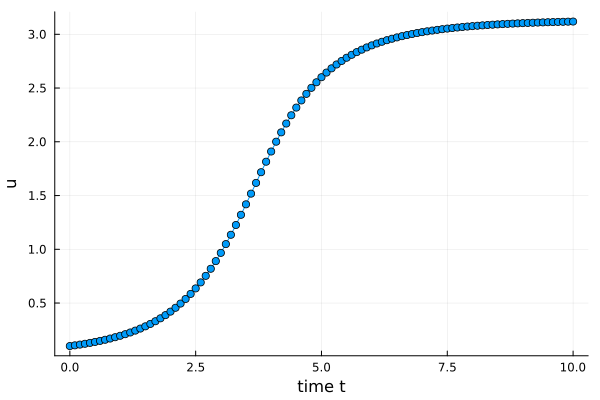

In [15]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [26]:
Δt = 1.51 # この値を大きくした．
u0 = 0.1

u = u0  # 最初の値はもちろん初期値
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = RK(u)  # Runge-Kutta 法で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
end

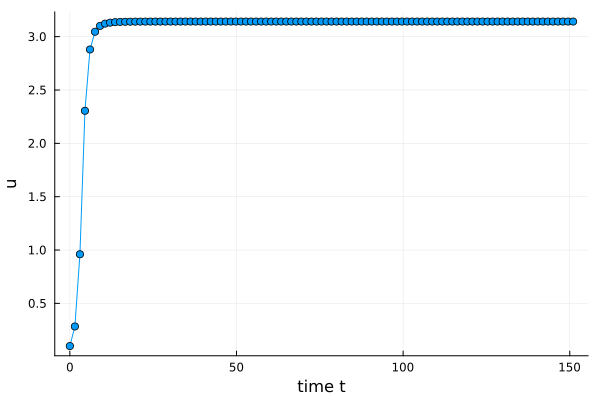

In [27]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)